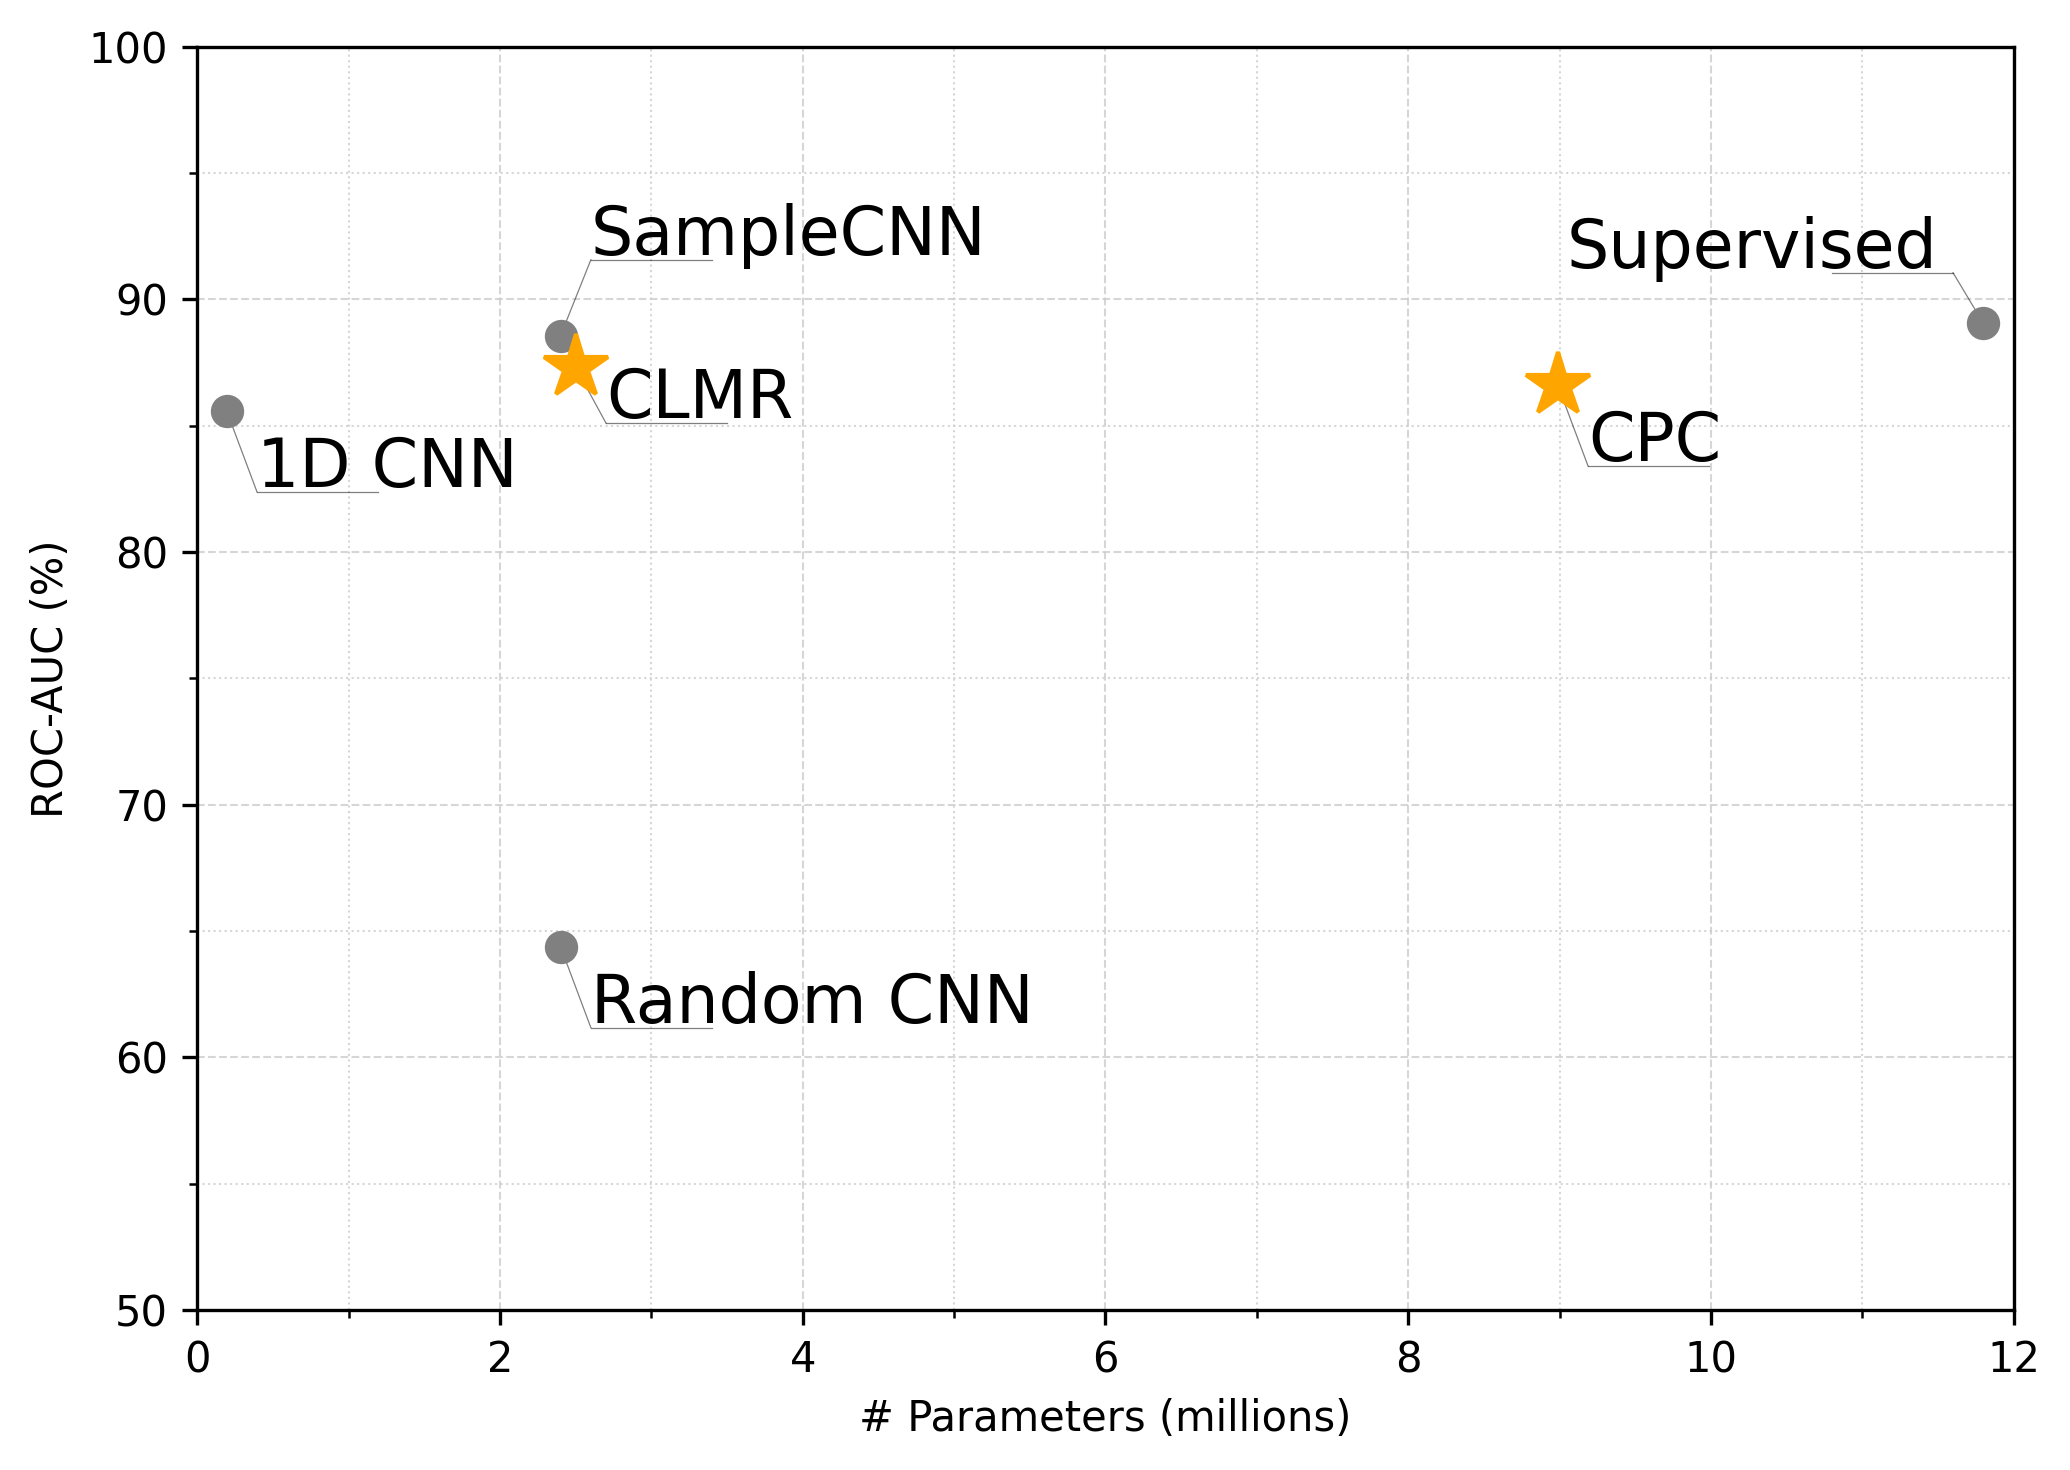

In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

fig, ax = plt.subplots(figsize=(7,5), dpi=300)

# Set axis ranges; by default this will put major ticks every 25.
ax.set_xlim(0, 12)
ax.set_ylim(50, 100)

# Change major ticks to show every 20.
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(10))

# Change minor ticks to show every 5. (20/4 = 5)
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#CCCCCC', linestyle='--', alpha=0.8, linewidth=0.5)
ax.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.8, linewidth=0.5)

padding = 0.2
markersize = 14
fontsize = 16
linealpha = 0.5

# SampleCNN random
random = [2.40, 64.38]
ax.text(random[0] + padding, random[1] - 3, "Random CNN", fontsize=fontsize)
ax.plot([random[0], random[0]+0.2], [random[1], random[1] - 3.2], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
ax.plot([random[0] + padding, random[0] + 1], [random[1] - 3.2, random[1] - 3.2], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
ax.plot(random[0], random[1], ".", linewidth=2, markersize=markersize, color="gray")



# Dieleman
dieleman = [0.194, 85.58]
ax.text(dieleman[0] + padding, dieleman[1] - 3, "1D CNN", fontsize=fontsize)
ax.plot([dieleman[0], dieleman[0]+0.2], [dieleman[1], dieleman[1] - 3.2], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
ax.plot([dieleman[0] + padding, dieleman[0] + 1], [dieleman[1] - 3.2, dieleman[1] - 3.2], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
ax.plot(dieleman[0], dieleman[1], ".", linewidth=2, markersize=markersize, color="gray")



# SampleCNN
samplecnn = [2.40, 88.56]
ax.text(samplecnn[0] + 0.2, samplecnn[1] + 3.2, "SampleCNN", fontsize=fontsize)
ax.plot([samplecnn[0], samplecnn[0]+0.2], [samplecnn[1], samplecnn[1] + 3], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
ax.plot([samplecnn[0] + padding, samplecnn[0] + 1], [samplecnn[1] + 3, samplecnn[1] + 3], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
ax.plot(samplecnn[0], samplecnn[1], ".", linewidth=2, markersize=markersize, color="gray")


# ours
# CLMR
clmr = [2.5, 87.3]# 87.55788687]
ax.text(clmr[0] + padding, clmr[1] - 2, "CLMR", fontsize=fontsize)
ax.plot([clmr[0], clmr[0]+0.2], [clmr[1], clmr[1] - 2.2], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
ax.plot([clmr[0] + padding, clmr[0] + 1], [clmr[1] - 2.2, clmr[1] - 2.2], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
ax.plot(clmr[0], clmr[1], "*", linewidth=2, markersize=markersize+2, color="orange")


# CPC
cpc = [8.988672, 86.60]# 87.99]
ax.text(cpc[0] + padding, cpc[1] - 3, "CPC", fontsize=fontsize)
ax.plot([cpc[0], cpc[0] + 0.2], [cpc[1], cpc[1] - 3.2], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
ax.plot([cpc[0] + padding, cpc[0] + 1], [cpc[1] - 3.2, cpc[1] - 3.2], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
ax.plot(cpc[0], cpc[1], "*", linewidth=2, markersize=markersize+2, color="orange")


# Supervised (Pons et al.)
pons = [11.80, 89.05]
ax.text(pons[0] - 2.75, pons[1] + 2.2, "Supervised", fontsize=fontsize)
ax.plot([pons[0], pons[0] - padding], [pons[1], pons[1] + 2], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
ax.plot([pons[0] - padding, pons[0] - 1], [pons[1] + 2, pons[1] + 2], color='k', linestyle='-', linewidth=0.3, alpha=linealpha)
ax.plot(pons[0], pons[1], ".", linewidth=2, markersize=markersize, color="gray")



plt.xlabel("# Parameters (millions)")
plt.ylabel("ROC-AUC (%)")
plt.tight_layout()
plt.savefig("./media/roc_auc_magnatagatune.png")
plt.show()

### TSNE

In [2]:
from IPython.display import display
import PIL

# display(PIL.Image.open("../logs/audio/magnatagatune/clmr/1/tsne/1490-0.png"))

In [3]:
import sys
import os
import argparse
import torch
import numpy as np
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt

from data import get_dataset
from model import load_model
from utils import load_context_config, eval_all
from utils.misc import label_to_tag

/home/jspijkervet/miniconda3/envs/clmr/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/home/jspijkervet/miniconda3/envs/clmr/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


## CLMR

In [9]:
import sys
import os
import argparse
import torch
import numpy as np
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt

from data import get_dataset
from model import load_model
from utils import load_context_config, eval_all
from utils.misc import label_to_tag

args = argparse.Namespace()
args.dataset = "magnatagatune"
args.logistic_epochs = 0
args.mlp = 1
args.perc_train_data = 1.0
args.logistic_lr = 0
args.model_path = "./logs/audio/magnatagatune/clmr/2"
args.epoch_num = 1490
args = load_context_config(args)
args.at_least_one_pos = False
args.supervised = 0
args.new_encoder = False
args.projector_layers = 2
args.train_stage = 0
args.transfer = 0
args.n_classes = args.num_tags
args.lin_eval = True
args.batch_size = args.logistic_batch_size
args.dataset = "magnatagatune"
args.logistic_epochs = 0
args.mlp = 1
args.perc_train_data = 1.0
args.logistic_lr = 0
args.logreg_model_path = "./logs/audio/magnatagatune/clmr/4"
args.logreg_epoch_num = 99


# Device configuration
args.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# seeds
np.random.seed(args.seed)
torch.manual_seed(args.seed)

(train_loader, train_dataset, val_loader, val_dataset, test_loader, test_dataset) = get_dataset(args)

clmr_model, _, _ = load_model(args, reload_model=True, name=args.model_name)
clmr_model.eval()
args.n_features = clmr_model.n_features

# initialize TensorBoard
writer = SummaryWriter(log_dir="/tmp")
args.global_step = 0
args.current_epoch = 0

model = None
optimizer = None
if not args.supervised:
    clmr_logreg_model, optimizer, _ = load_model(args, reload_model=True, name="eval")
    clmr_logreg_model = clmr_logreg_model.to(args.device)

# eval all
clmr_metrics = eval_all(
    args,
    test_loader,
    clmr_model,
    clmr_logreg_model,
    writer,
    n_tracks=None,
)

for k, v in clmr_metrics.items():
    if "hparam" in k:
        print(f"[Test]: {k}: {v}")

### Linear / Supervised training, using segmented dataset ###
Num segments: 187060
Num tracks: 18706
datasets/audio/magnatagatune/statistics_segments_22050.csv
[Train dataset (magnatagatune_segments_22050)]: Loaded mean/std: -7.70555e-05, 0.17842068
### Linear / Supervised training, using segmented dataset ###
Num segments: 18250
Num tracks: 1825
datasets/audio/magnatagatune/statistics_segments_22050.csv
[Validation dataset (magnatagatune_segments_22050)]: Loaded mean/std: -7.70555e-05, 0.17842068
### Linear / Supervised training, using segmented dataset ###
Num segments: 53290
Num tracks: 5329
datasets/audio/magnatagatune/statistics_segments_22050.csv
[Test dataset (magnatagatune_segments_22050)]: Loaded mean/std: -7.70555e-05, 0.17842068
### SampleCNN59049 ###
### RELOADING CLMR MODEL FROM CHECKPOINT 1490 ###
### Using Adam optimizer ###
### RELOADING CLMR OPTIMIZER FROM CHECKPOINT 1490 ###
### RELOADING EVAL MODEL FROM CHECKPOINT 99 ###
### Using Adam optimizer ###
[Test] Step [0/53

## CPC

In [10]:
args = argparse.Namespace()
args.dataset = "magnatagatune"
args.logistic_epochs = 0
args.mlp = 1
args.perc_train_data = 1.0
args.logistic_lr = 0
args.model_path = "./logs/audio/magnatagatune/cpc/25"
args.epoch_num = 670
args = load_context_config(args)
args.at_least_one_pos = False
args.supervised = 0
args.new_encoder = False
args.projector_layers = 2
args.train_stage = 0
args.transfer = 0
args.n_classes = args.num_tags
args.lin_eval = True
args.batch_size = args.logistic_batch_size
args.pretrain_dataset = "magnatagatune"
args.logistic_epochs = 0
args.mlp = 1
args.perc_train_data = 1.0
args.logistic_lr = 0
args.logreg_model_path = "./logs/audio/magnatagatune/cpc/58"
args.logreg_epoch_num = 99
args.transfer = 1
args.model_name = "cpc"


# Device configuration
args.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# seeds
np.random.seed(args.seed)
torch.manual_seed(args.seed)

(train_loader, train_dataset, val_loader, val_dataset, test_loader, test_dataset) = get_dataset(args)

cpc_model, _, _ = load_model(args, reload_model=True, name=args.model_name)
cpc_model.eval()

args.n_features = cpc_model.n_features

# initialize TensorBoard
writer = SummaryWriter(log_dir="/tmp")
args.global_step = 0
args.current_epoch = 0

model = None
optimizer = None
if not args.supervised:
    cpc_logreg_model, optimizer, _ = load_model(args, reload_model=True, name="eval")
    cpc_logreg_model = cpc_logreg_model.to(args.device)

# eval all
cpc_metrics = eval_all(
    args,
    test_loader,
    cpc_model,
    cpc_logreg_model,
    writer,
    n_tracks=None,
)

for k, v in cpc_metrics.items():
    if "hparam" in k:
        print(f"[Test]: {k}: {v}")

### Linear / Supervised training, using segmented dataset ###
Num segments: 187060
Num tracks: 18706
./datasets/audio/magnatagatune/statistics_segments_22050.csv
[Train dataset (magnatagatune_segments_22050)]: Loaded mean/std: -7.70555e-05, 0.17842068
### Linear / Supervised training, using segmented dataset ###
Num segments: 18250
Num tracks: 1825
./datasets/audio/magnatagatune/statistics_segments_22050.csv
[Validation dataset (magnatagatune_segments_22050)]: Loaded mean/std: -7.70555e-05, 0.17842068
### Linear / Supervised training, using segmented dataset ###
Num segments: 53290
Num tracks: 5329
./datasets/audio/magnatagatune/statistics_segments_22050.csv
[Test dataset (magnatagatune_segments_22050)]: Loaded mean/std: -7.70555e-05, 0.17842068
### InfoNCE Loss ###
### RELOADING CPC MODEL FROM CHECKPOINT 670 ###
### Using Adam optimizer ###
### RELOADING EVAL MODEL FROM CHECKPOINT 99 ###
### Using Adam optimizer ###
[Test] Step [0/5329]
[Test] Step [100/5329]
[Test] Step [200/5329]
[T

## SampleCNN supervised

In [7]:
%load_ext autoreload
%autoreload 2
import sys
import os
import argparse
import torch
import numpy as np
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt

from data import get_dataset
from model import load_model
from utils import load_context_config, eval_all
from utils.misc import label_to_tag

args = argparse.Namespace()
args.dataset = "magnatagatune"
args.logistic_epochs = 0
args.mlp = 1
args.perc_train_data = 1.0
args.logistic_lr = 0
args.model_path = "./logs/audio/magnatagatune/supervised/40"
args.epoch_num = 19
args = load_context_config(args)
args.at_least_one_pos = False
args.supervised = 1
args.new_encoder = False
args.projector_layers = 2
args.train_stage = 0
args.transfer = 0
args.n_classes = args.num_tags
args.lin_eval = True
args.batch_size = args.logistic_batch_size
args.pretrain_dataset = "magnatagatune"
args.logistic_epochs = 0
args.mlp = 1
args.perc_train_data = 1.0
args.model_name = "clmr"


# Device configuration
args.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# seeds
np.random.seed(args.seed)
torch.manual_seed(args.seed)

(train_loader, train_dataset, val_loader, val_dataset, test_loader, test_dataset) = get_dataset(args)

supervised_model, _, _ = load_model(args, reload_model=True, name=args.model_name)
supervised_model.eval()

args.n_features = supervised_model.n_features

# initialize TensorBoard
writer = SummaryWriter(log_dir="/tmp")
args.global_step = 0
args.current_epoch = 0

model = torch.nn.Linear(512, 50)
model = model.to(args.device)


# eval all
supervised_metrics = eval_all(
    args,
    test_loader,
    supervised_model,
    model,
    writer,
    n_tracks=None,
)

for k, v in supervised_metrics.items():
    if "hparam" in k:
        print(f"[Test]: {k}: {v}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
### Linear / Supervised training, using segmented dataset ###
Num segments: 187060
Num tracks: 18706
datasets/audio/magnatagatune/statistics_segments_22050.csv
[Train dataset (magnatagatune_segments_22050)]: Loaded mean/std: -7.70555e-05, 0.17842068
### Linear / Supervised training, using segmented dataset ###
Num segments: 18250
Num tracks: 1825
datasets/audio/magnatagatune/statistics_segments_22050.csv
[Validation dataset (magnatagatune_segments_22050)]: Loaded mean/std: -7.70555e-05, 0.17842068
### Linear / Supervised training, using segmented dataset ###
Num segments: 53290
Num tracks: 5329
datasets/audio/magnatagatune/statistics_segments_22050.csv
[Test dataset (magnatagatune_segments_22050)]: Loaded mean/std: -7.70555e-05, 0.17842068
### SampleCNN59049 ###
### RELOADING CLMR MODEL FROM CHECKPOINT 19 ###
### Using Adam optimizer ###
[Test] Step [0/5329]
[Test] Step [100/5329]
[Test] Step [200/5

In [122]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame(columns=["auc", "ap", "tag", "model"])

for idx, (clmr_auc, clmr_ap, cpc_auc, cpc_ap, supervised_auc, supervised_ap) in enumerate(zip(clmr_metrics["all/auc"], clmr_metrics["all/ap"],
                                                                                              cpc_metrics["all/auc"],
                                                                                              cpc_metrics["all/ap"],
                                                                                             supervised_metrics["all/auc"],
                                                                                             supervised_metrics["all/ap"])):
    df = df.append({"auc": clmr_auc*100, "ap": clmr_ap*100, "tag": train_loader.dataset.tags[idx], "model": "CLMR"}, ignore_index=True)
    df = df.append({"auc": cpc_auc*100, "ap": cpc_ap*100, "tag": train_loader.dataset.tags[idx], "model": "CPC"}, ignore_index=True)
    df = df.append({"auc": supervised_auc*100, "ap": supervised_ap*100, "tag": train_loader.dataset.tags[idx], "model": "supervised"}, ignore_index=True)


In [123]:
df = df.sort_values(by="auc", ascending=False)

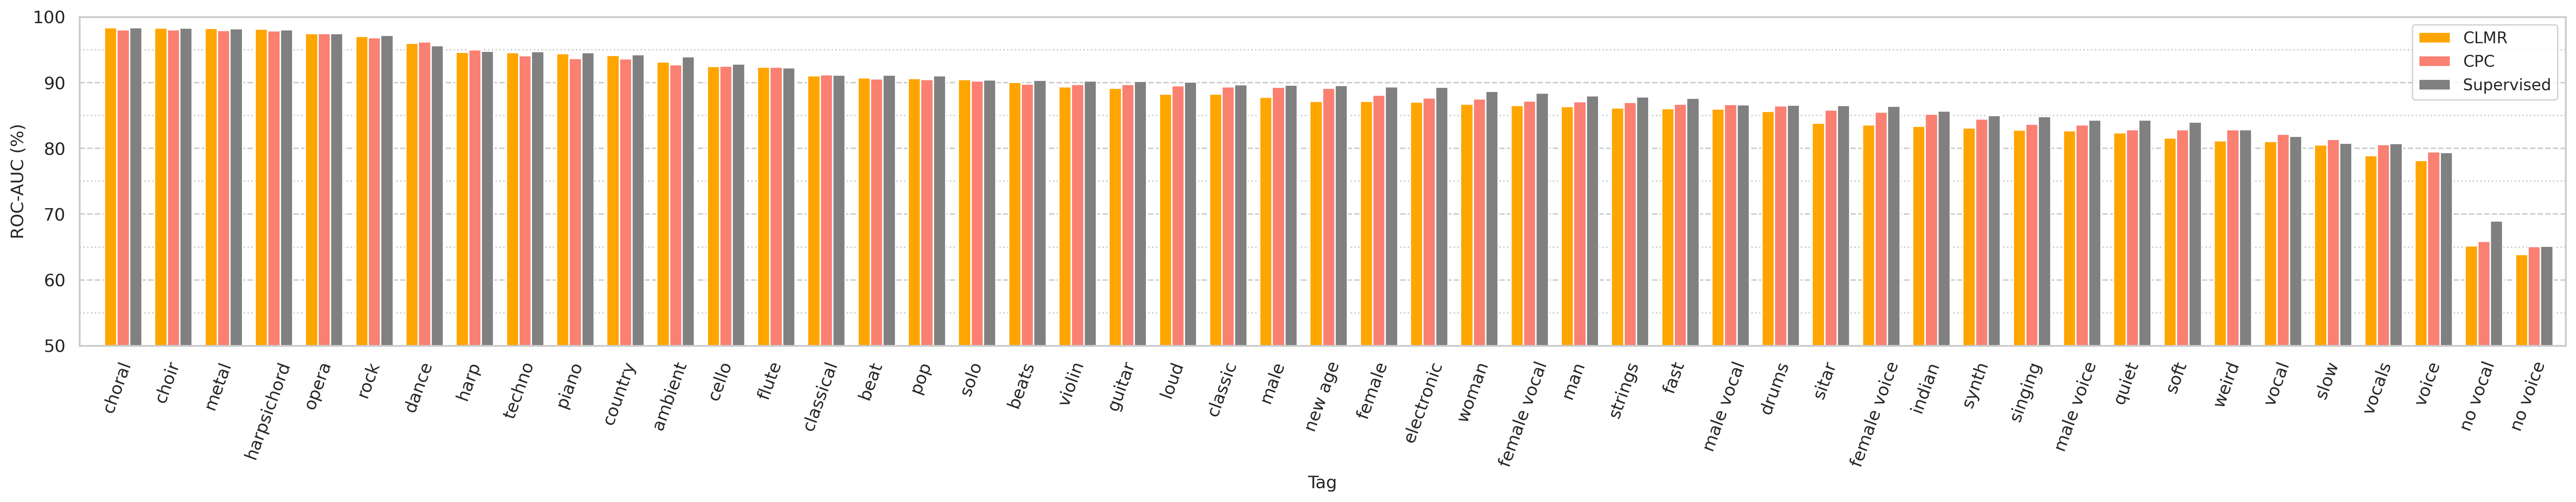

In [275]:
fig, ax = plt.subplots(figsize=(25,5), dpi=300)


pos = list(range(50))
width = 1

new_x = [4*i for i in pos]
plt.bar([p for p in new_x], 
        #using df['pre_score'] data,
        df[df["model"] == "CLMR"]["auc"], 
        width=width,
        align="edge",
        alpha=1.0, 
        color='orange', 
        label=df[df["model"] == "CLMR"]["tag"])

plt.bar([p + width for p in new_x], 
        #using df['pre_score'] data,
        df[df["model"] == "CPC"]["auc"], 
        width=width,
        align="edge",
        alpha=1.0, 
        color='salmon', 
        label=df[df["model"] == "CPC"]["tag"])


plt.bar([p + width*2 for p in new_x], 
        #using df['pre_score'] data,
        df[df["model"] == "supervised"]["auc"], 
        width=width,
        align="edge",
        alpha=1.0, 
        color='gray', 
        label=df[df["model"] == "supervised"]["tag"])


ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

ax.xaxis.grid(False, which='both')


ax.set_xticks([p + width for p in new_x])
ax.set_xticklabels(df[df["model"] == "CLMR"]["tag"])

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('DejaVu Sans')
    label.set_fontsize(12)

plt.xlabel("Tag")
plt.xticks(rotation=70)

plt.ylabel("ROC-AUC (%)")
plt.xlim(-2, max(new_x))
plt.ylim(50, 100)
plt.legend(["CLMR", "CPC", "Supervised"], loc='upper right')
plt.tight_layout()
plt.savefig("./media/tag_retrieval.png")
plt.show()